In [25]:
from task_offloading_moo.pymoo.algorithms.puma_optimizer import PumaOptimizer
from task_offloading_moo.pymoo.problem import TaskOffloadingProblem
from task_offloading_moo.pymoo.operators.repair import TaskOffloadingRepair
from task_offloading_moo.pymoo.operators.sampling import TaskOffloadingSampling
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

In [26]:
pop_size = 100
n_max_iters = 50

num_cloud_machines = 30
num_fog_machines = 20
num_tasks = 500

algorithm = PumaOptimizer(repair=TaskOffloadingRepair(),
                      use_soft_repair=True,
                      pop_size=pop_size,
                      sampling=TaskOffloadingSampling(),
                      n_max_iters=n_max_iters,
                      archive_size=100,
                      save_history=True,
                      )

problem = TaskOffloadingProblem(num_cloud_machines, num_fog_machines, num_tasks, use_random_machines=True)

In [27]:
res = minimize(problem,
           algorithm,
           seed=1,
           verbose=True)

n_gen  |  n_eval  |     explor    |    exploit    |   is_explore  | n_nds  |      eps      |   indicator  
     1 |      100 |             0 |             0 |            no |      9 |             - |             -
     2 |      101 |  9.822075E+02 |  9.822075E+02 |            no |     59 |  0.0066808680 |             f
     3 |      101 |  3.227788E+02 |  2.103402E+02 |           yes |     59 |  0.000000E+00 |             f
     4 |      105 |  1.935963E+02 |  1.249164E+02 |           yes |     27 |  0.0161346425 |         ideal
     5 |      105 |  6.421766E+01 |  9.066094E+01 |            no |     27 |  0.0005714188 |             f
     6 |      105 |  5.085520E+01 |  9.867136E+01 |            no |     28 |  0.3281829829 |         ideal
     7 |      105 |  4.194689E+01 |  3.769389E+01 |           yes |     20 |  0.0171288310 |             f
     8 |      107 |  9.666995E+01 |  3.109428E+01 |           yes |     20 |  0.000000E+00 |             f
     9 |      110 |  1.179903E+01 |  

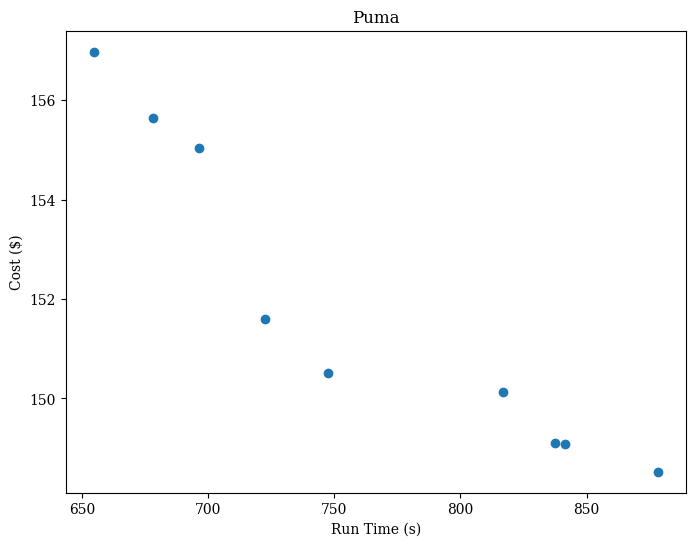

In [28]:
# print(f"Best population found:\n {res.X} \nwith F:\n{res.F}")

plot = Scatter(title="Puma")
plot.add(res.F)
plot.axis_labels = problem.dataset_generator.get_objective_names()
_ = plot.show()

In [29]:
# res.archive.get("F")

In [30]:
from pyrecorder.recorder import Recorder
from pyrecorder.writers.video import Video
import os

out_path = os.path.join(os.path.dirname(os.getcwd()), "output")
os.makedirs(out_path, exist_ok=True)
with Recorder(Video(os.path.join(out_path, "video.mp4"))) as rec:

    # for each algorithm object in the history
    for entry in res.history:
        sc = Scatter(title=("Gen %s" % entry.n_gen))
        sc.add(entry.opt.get("F"))
        sc.add(entry.problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
        sc.do()

        # finally record the current visualization to the video
        rec.record()